In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy
import matplotlib 
plt.rcParams['text.usetex'] = True

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

In [2]:
def tv_dist(x, y):
    return np.sum(np.abs(x-y))/2

In [35]:
def get_stats(right_range=10):
    x = np.linspace(-10, right_range, 1000, endpoint=False)
    plt.figure(figsize=(30,10))
    pdef = st.multivariate_normal.pdf(x)
    
    kls = []
    rev_kls = []
    tvs = []
    avgs = []
    for i in range(70, 100):
        p = st.multivariate_normal(i/10, 1).pdf(x)
        avgs.append((p/pdef).mean())
        kls.append(scipy.special.kl_div(pdef, p).sum())
        rev_kls.append(scipy.special.kl_div(p, pdef).sum())
        tvs.append(tv_dist(pdef, p))
    return kls, rev_kls, tvs, avgs

<Figure size 2160x720 with 0 Axes>

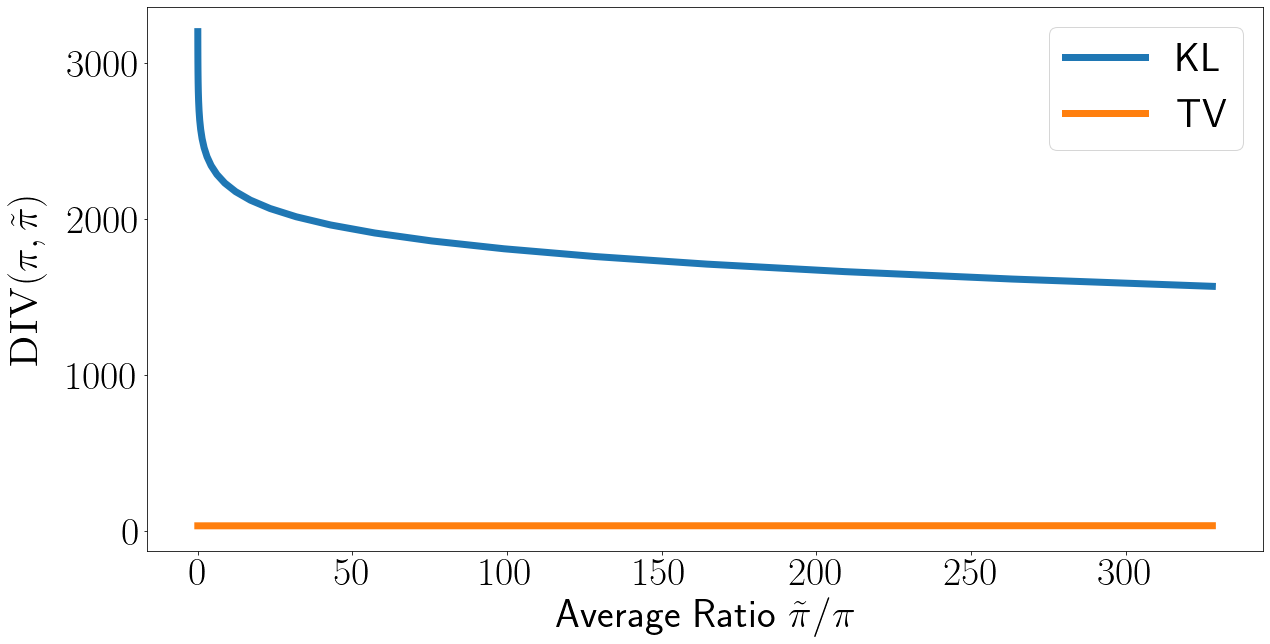

In [36]:
kls, rev_kls, tvs, sums = get_stats(right_range=5)
plt.figure(figsize=(20,10))
plt.plot(sums, kls, label='KL', linewidth=7)
# plt.plot(rev_kls, label='Reverse KL')
plt.plot(sums, tvs, label='TV', linewidth=7)
plt.xlabel(r"Average Ratio $\tilde{\pi}/\pi$", fontsize=40)
plt.ylabel(r"$\textsc{DIV}(\pi, \tilde{\pi})$", fontsize=40, labelpad=20)
plt.legend(fontsize=40);
plt.savefig('divergences.pdf')

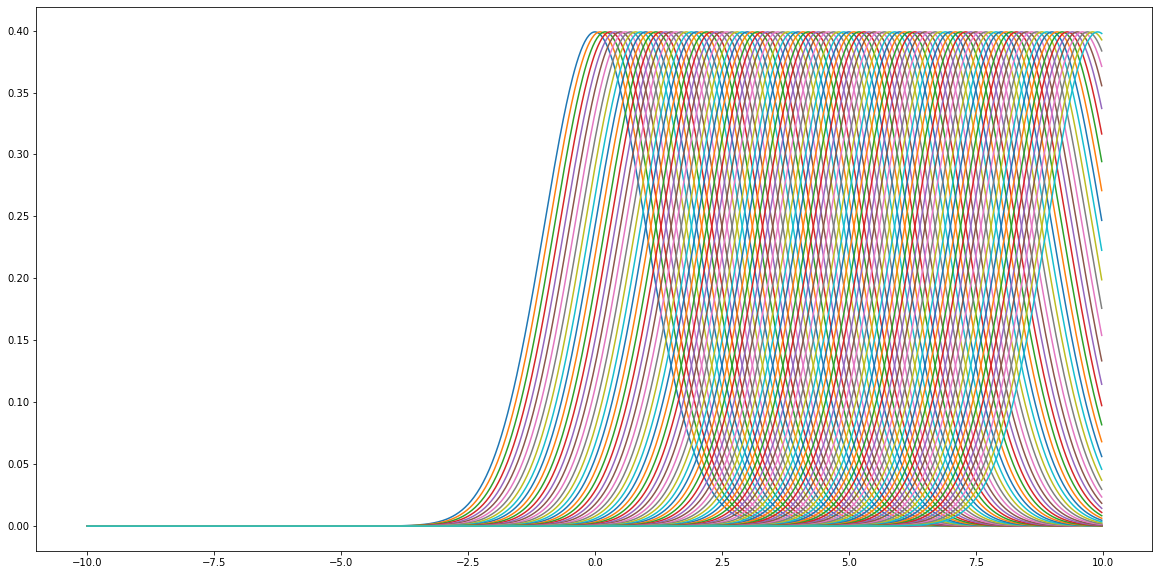

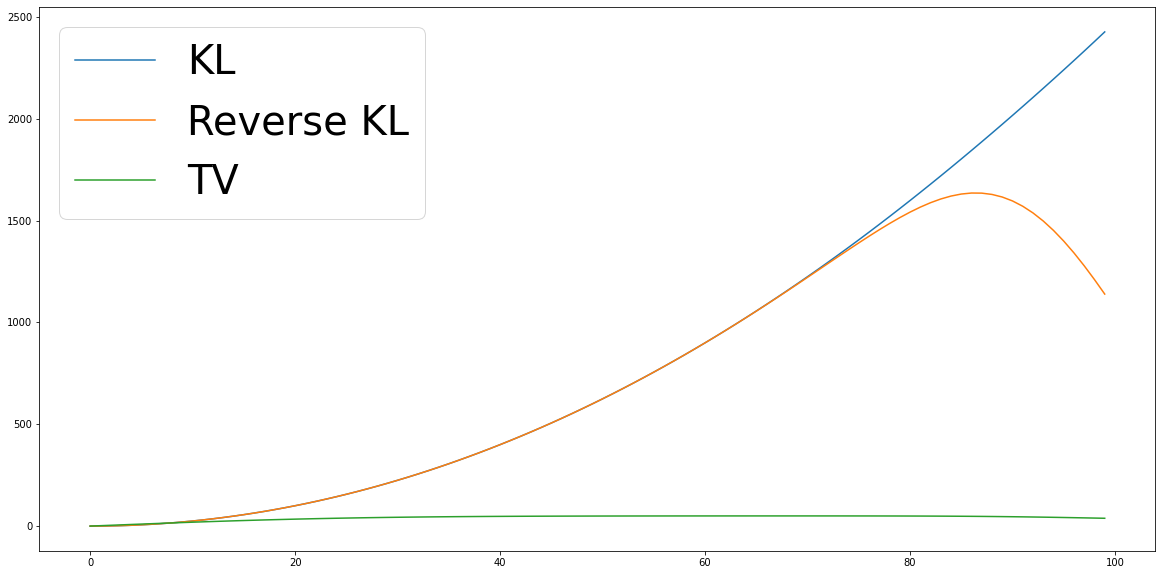

In [6]:
# let's add more points to the right


kls, rev_kls, tvs = get_stats(right_range=10)
plt.figure(figsize=(20,10))
plt.plot(kls, label='KL')
plt.plot(rev_kls, label='Reverse KL')
plt.plot(tvs, label='TV')
plt.legend(fontsize=40);

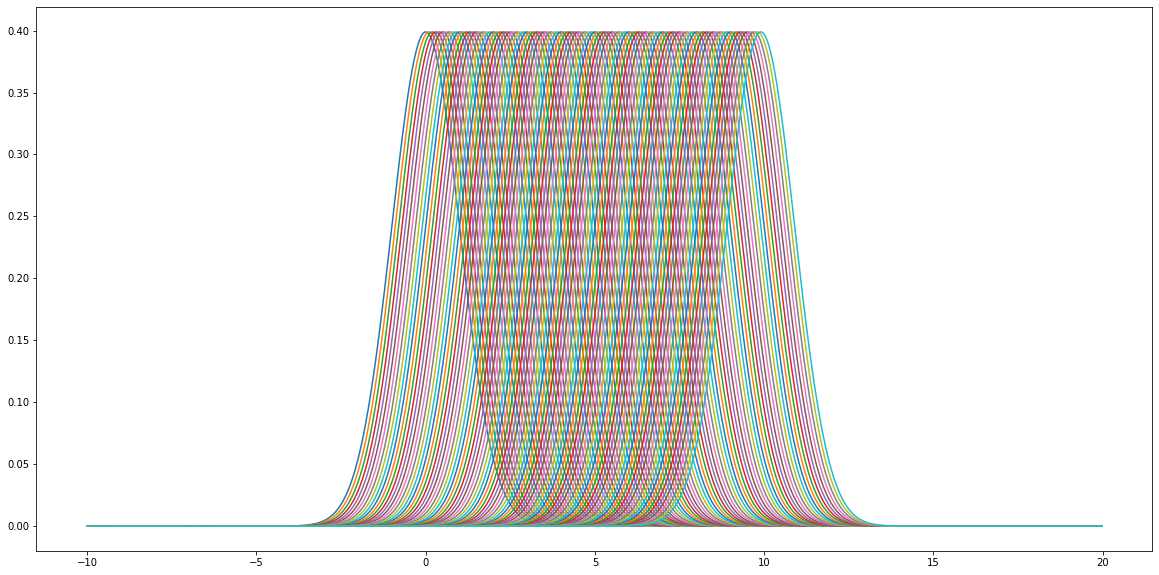

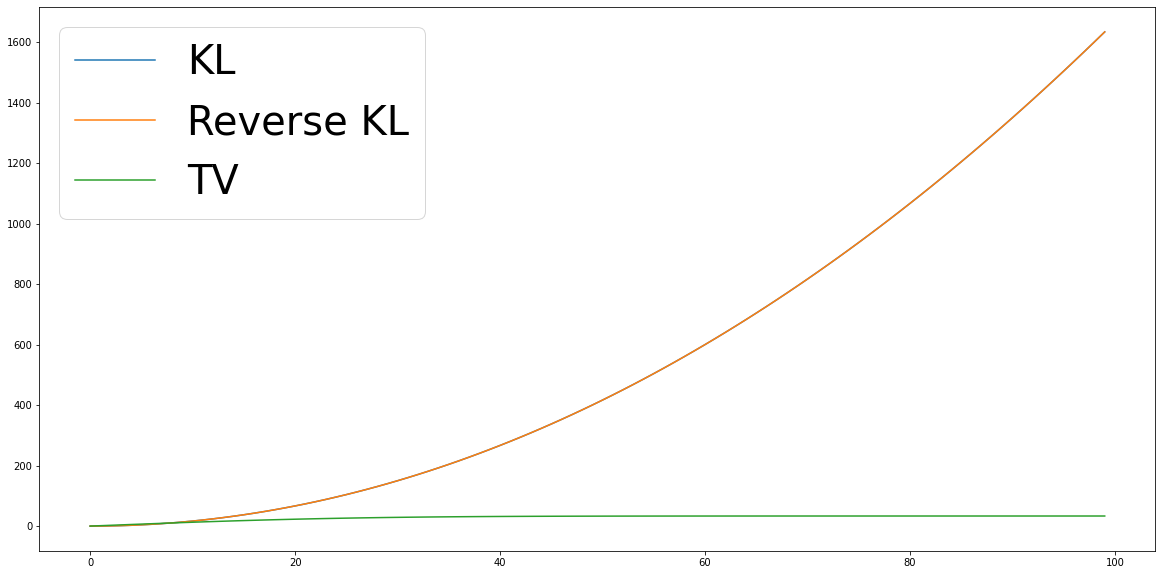

In [109]:
# let's add EVEN more points to the right (KL will overlap with inverse KL)


kls, rev_kls, tvs = get_stats(right_range=20)
plt.figure(figsize=(20,10))
plt.plot(kls, label='KL')
plt.plot(rev_kls, label='Reverse KL')
plt.plot(tvs, label='TV')
plt.legend(fontsize=40);

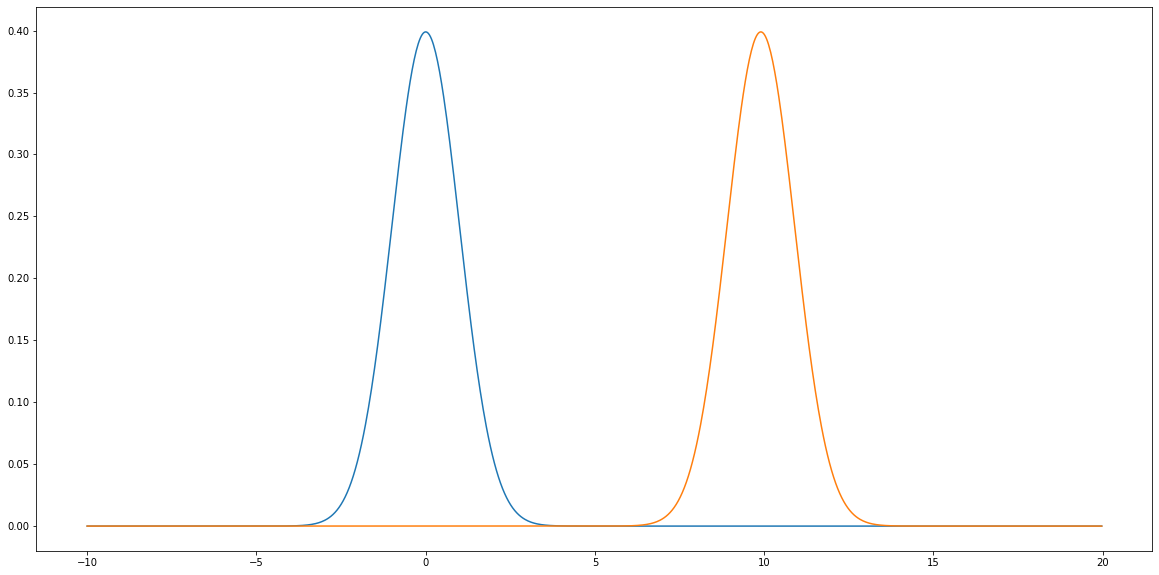

In [111]:
x = np.linspace(-10, 20, 1000, endpoint=False)
plt.figure(figsize=(20,10))
pdef = st.multivariate_normal.pdf(x)

for i in range(100):
    p = st.multivariate_normal(i/10, 1).pdf(x)
    if i == 0 or i == 99:
        plt.plot(x,p)
